# K-Mean Clustring

In [1]:
import numpy as  np
import math
import sys
from sklearn.datasets.samples_generator import make_blobs

#### Generate data

In [2]:
X, data_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

c1 = [-1.0, 3.0]
c2 = [1.0, 5.0]
c3 = [2.0, 1.5]
cc = [c1, c2, c3]


### Caluclate ditance base on euclidean distance formula

In [3]:
def cal_distance_centers(datapoint , centers):
    min_distance = sys.maxsize
    min_center = None
    
    for center_id  , c in enumerate(centers):
        distance = math.sqrt(math.pow(datapoint[0] - c[0],2) + math.pow(datapoint[1] - c[1],2))
        if distance < min_distance :
            min_distance = distance
            min_center = center_id
    
    return min_center

In [4]:
def KMean_clustering(dataset, centers , iteration ):
    adjusted_centers = centers
    clusters = { k:[] for k in range(len(centers))}
    for i in range(iteration):
        for x in dataset:
            close_center =  cal_distance_centers(x, adjusted_centers)
            clusters[close_center].append(x)
        
        new_centers = [[0,0]] * len(adjusted_centers)
        for index , cen in enumerate(adjusted_centers):
               new_centers[index] = np.mean( clusters[index], axis = 0)
                
        diff = abs(np.array(adjusted_centers)).sum() - abs(np.array(new_centers)).sum()
        
        if diff > 0:
            adjusted_centers = new_centers
        else :
            print("Converge in teration {}!".format(i+1))
            break;
        
            
    return adjusted_centers



new_cc = KMean_clustering(X, cc , 5 )
for i , center in enumerate(new_cc):
    print("Center {}:{}".format(i+1, center))

Converge in teration 2!
Center 1:[-1.55168191  2.87619177]
Center 2:[0.96706547 4.38346703]
Center 3:[1.96887266 0.84517309]


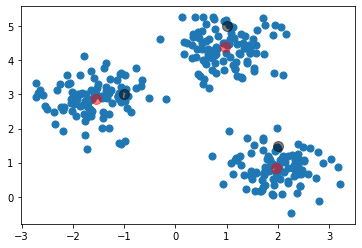

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], s= 50)
plt.scatter(np.array(cc)[:,0], np.array(cc)[:,1], s= 100 , c ='black' , alpha = 0.5)
plt.scatter(np.array(new_cc)[:,0], np.array(new_cc)[:,1], s= 100 , c ='red' , alpha = 0.5)
plt.show()